In [143]:
# Mengimport Libraries
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
#import data dan membaca file csv
df = pd.read_csv('StudentPerformanceFactors.csv')
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [144]:
# Menampilkan ringkasan informasi dataframenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

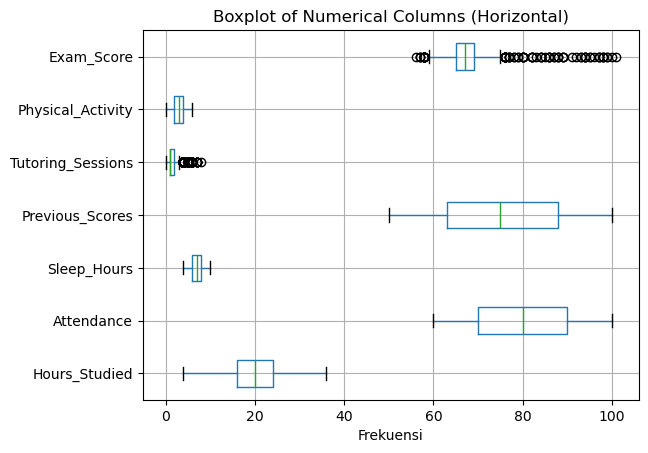

In [171]:
import matplotlib.pyplot as plt

# Membuat boxplot horizontal untuk beberapa kolom numerik
df.boxplot(column=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                   'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'], vert=False)
plt.title('Boxplot of Numerical Columns (Horizontal)')
plt.xlabel('Frekuensi')
plt.show()


Tutoring Sessions

In [146]:
# Fungsi untuk menghitung batas dan menemukan outlier
def find_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

# Hitung batas untuk 'Tutoring_Sessions'
lower_bound_tutoring, upper_bound_tutoring = find_outliers(df, 'Tutoring_Sessions')

# Hitung batas untuk 'Exam_Score'
lower_bound_exam, upper_bound_exam = find_outliers(df, 'Exam_Score')

# Temukan outlier dalam DataFrame
outliers_tutoring = df[(df['Tutoring_Sessions'] < lower_bound_tutoring) | (df['Tutoring_Sessions'] > upper_bound_tutoring)]
outliers_exam = df[(df['Exam_Score'] < lower_bound_exam) | (df['Exam_Score'] > upper_bound_exam)]

print("Outlier Tutoring_Sessions: ")
print(outliers_tutoring)
print("\nOutlier Exam_Score: ")
print(outliers_exam)

Outlier Tutoring_Sessions: 
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
10               17          80                  Low                High   
76               21          77                  Low              Medium   
82               29          78                 High                High   
124              24          73               Medium                High   
129              17          94                  Low              Medium   
...             ...         ...                  ...                 ...   
6552             22          65                  Low              Medium   
6553             16          74                  Low                High   
6559             28          72                  Low              Medium   
6579              9          84               Medium              Medium   
6594              9          90                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scor

In [147]:
# Membersihkan DataFrame dari outlier
df_cleaned = df[~((df['Tutoring_Sessions'] < lower_bound_tutoring) | 
                   (df['Tutoring_Sessions'] > upper_bound_tutoring) | 
                   (df['Exam_Score'] < lower_bound_exam) | 
                   (df['Exam_Score'] > upper_bound_exam))]

# Tampilkan DataFrame yang telah dibersihkan
print("\nDataFrame setelah membersihkan outlier: ")
print(df_cleaned)


DataFrame setelah membersihkan outlier: 
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours 

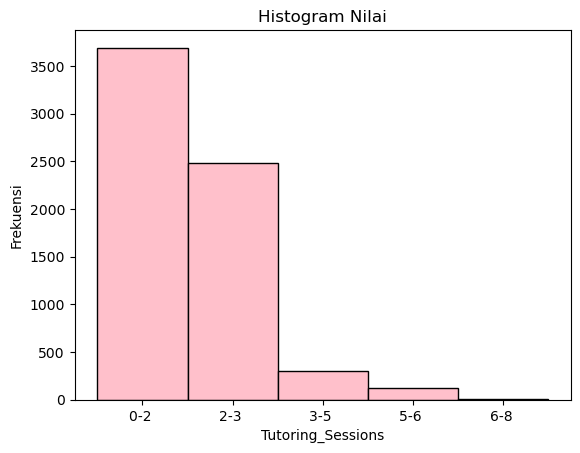

In [148]:
data_Tutoring_Sessions = df["Tutoring_Sessions"]
# Buat histogram
n, bins, patches = plt.hist(data_Tutoring_Sessions, bins=5, color='pink', edgecolor='black')

# Tambahkan Label
plt.title('Histogram Nilai')
plt.xlabel('Tutoring_Sessions')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

In [149]:
df.boxplot(column=['Tutoring_Sessions'])

<Axes: >

In [150]:

# Menghapus duplikasi berdasarkan kolom Tutoring Sessions saja
df_cleaned = df.drop_duplicates(subset=['Tutoring_Sessions'])

# Menampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat berdasarkan 'Tutoring_Sessions':", len(df_cleaned))

Jumlah data setelah penghapusan duplikat berdasarkan 'Tutoring_Sessions': 9


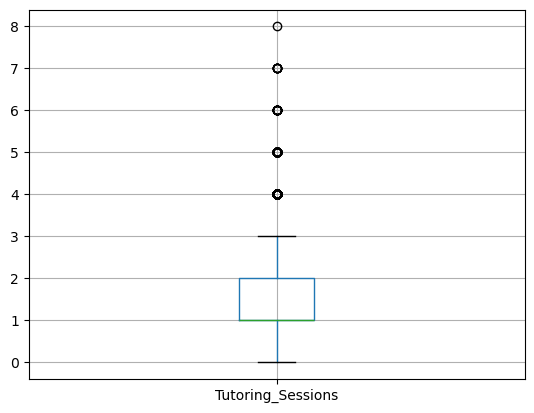

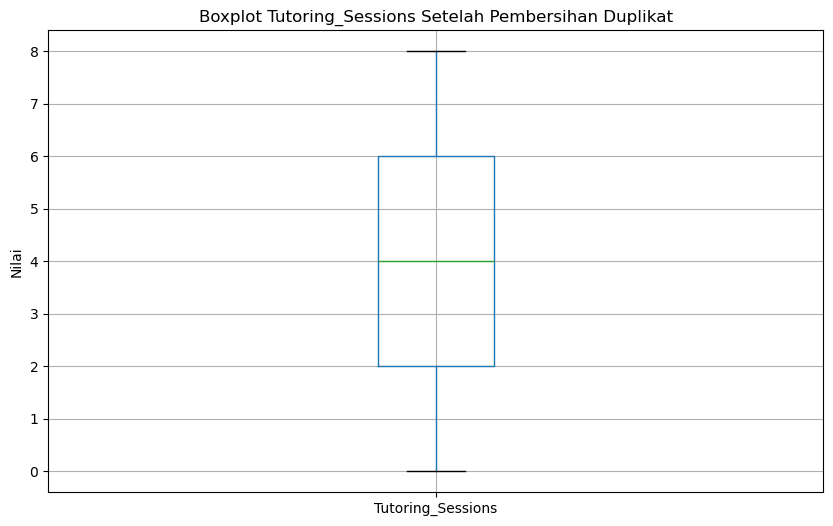

In [151]:
# Membuat boxplot dari data yang sudah dibersihkan
plt.figure(figsize=(10, 6))
df_cleaned[['Tutoring_Sessions']].boxplot()
plt.title('Boxplot Tutoring_Sessions Setelah Pembersihan Duplikat')
plt.ylabel('Nilai')
plt.show()

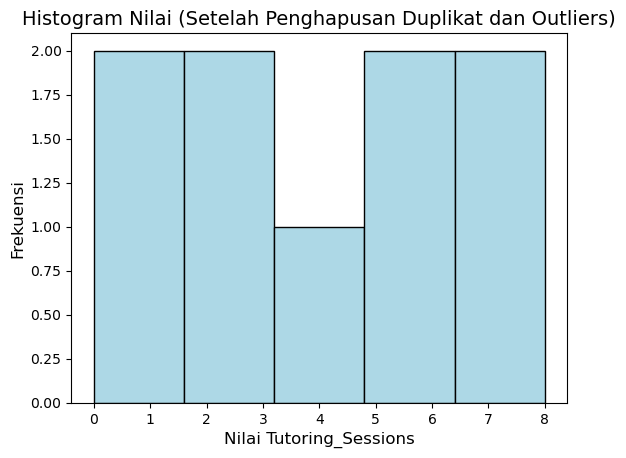

In [152]:
# Mengambil kolom Tutoring_Sessions dari data yang sudah dibersihkan dari duplikat
data_Tutoring_Sessions_cleaned = df_cleaned['Tutoring_Sessions']
# Membuat histogram setelah membersihkan duplikat dan outliers
n, bins, patches = plt.hist(data_Tutoring_Sessions_cleaned, bins=5, color='lightblue', edgecolor='black')

# Menambahkan label
plt.title('Histogram Nilai (Setelah Penghapusan Duplikat dan Outliers)', fontsize=14)
plt.xlabel('Nilai Tutoring_Sessions', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menampilkan histogram
plt.show()

Exam Score

In [153]:
data_Exam_Score = df['Exam_Score']
# Buat Histogram
n, bins, patches = plt.hist(data_Exam_Score, bins=5, color='pink', edgecolor='black')

# Menambahkan judul dan label
plt.title('Histogram Nilai Exam_Score', fontsize=14)
plt.xlabel('Nilai Exam_Score', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
# Tambahkan label
plt.title('Histogram Exam_Score')

Text(0.5, 1.0, 'Histogram Exam_Score')

In [154]:
df.boxplot(column=['Exam_Score'])

<Axes: title={'center': 'Histogram Exam_Score'}, xlabel='Nilai Exam_Score', ylabel='Frekuensi'>

In [155]:
# Menghapus duplikasi berdasarkan kolom 'Exam Score'saja
df_cleaned = df.drop_duplicates(subset=['Exam_Score'])

# Menampilkan jumlah data setelah penghapusan duplikat
print("Jumlah data setelah penghapusan duplikat berdasarkan 'Exam_Score':", len(df_cleaned))

Jumlah data setelah penghapusan duplikat berdasarkan 'Exam_Score': 45


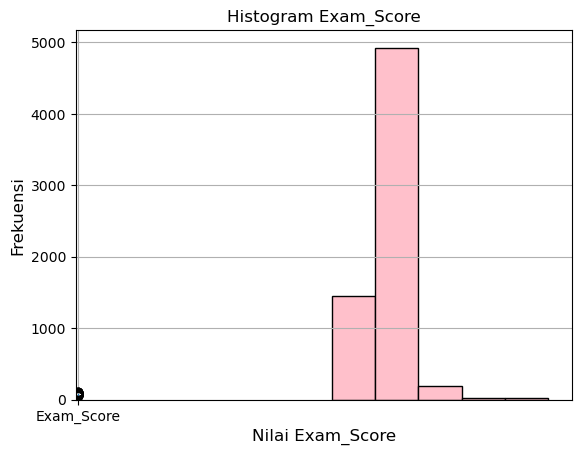

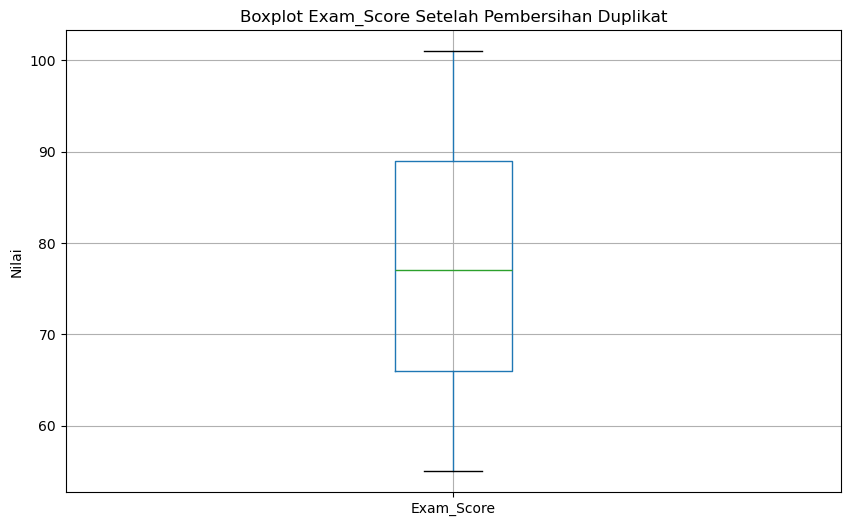

In [156]:
# Membuat boxplot dari data yang sudah dibersihkan
plt.figure(figsize=(10, 6))
df_cleaned[['Exam_Score']].boxplot()
plt.title('Boxplot Exam_Score Setelah Pembersihan Duplikat')
plt.ylabel('Nilai')
plt.show()

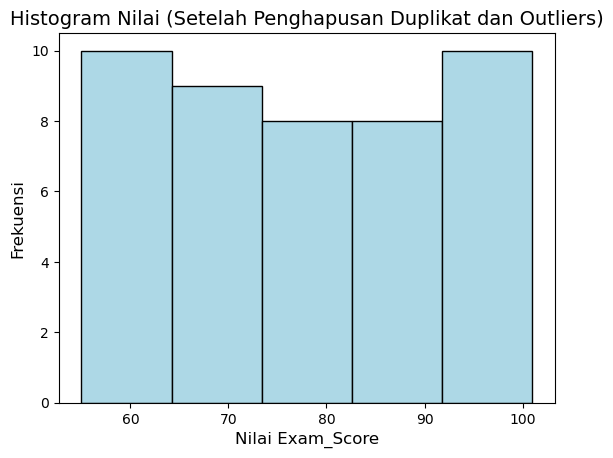

In [157]:
# Mengambil kolom Exam_Score dari data yang sudah dibersihkan dari duplikat
data_Exam_Score_cleaned = df_cleaned['Exam_Score']
# Membuat histogram setelah membersihkan duplikat dan outliers
n, bins, patches = plt.hist(data_Exam_Score_cleaned, bins=5, color='lightblue', edgecolor='black')

# Menambahkan label
plt.title('Histogram Nilai (Setelah Penghapusan Duplikat dan Outliers)', fontsize=14)
plt.xlabel('Nilai Exam_Score', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menampilkan histogram
plt.show()


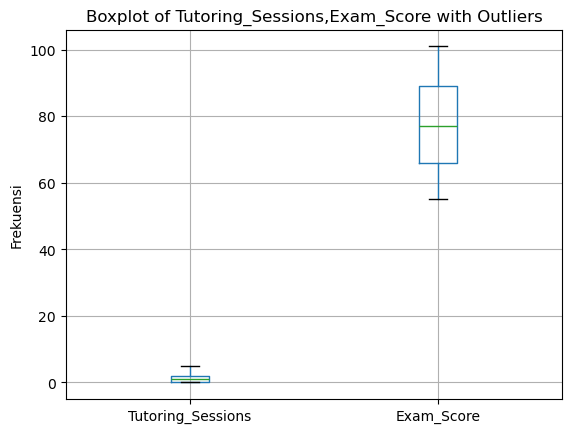

In [158]:
df_cleaned.boxplot(column=[ 'Tutoring_Sessions','Exam_Score' ])
plt.title('Boxplot of Tutoring_Sessions,Exam_Score with Outliers')
plt.ylabel('Frekuensi')
plt.show()

In [159]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

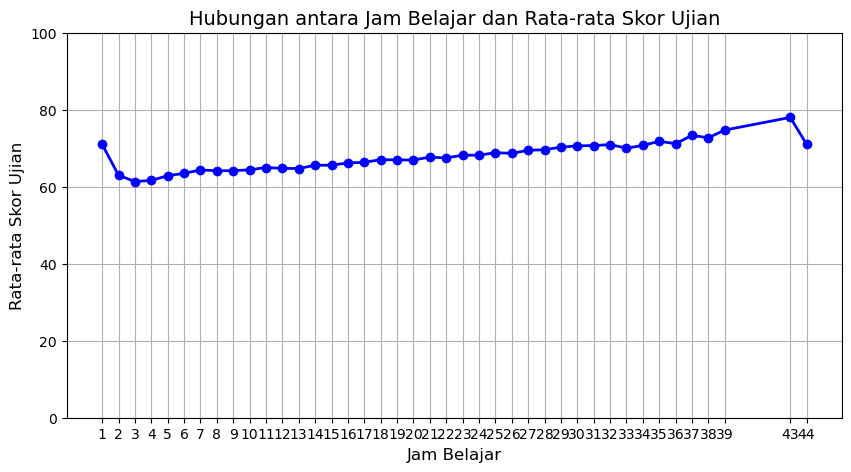

In [160]:
# Menghitung rata-rata skor ujian berdasarkan jam belajar
average_scores = df.groupby('Hours_Studied')['Exam_Score'].mean().reset_index()

# Membuat diagram garis
plt.figure(figsize=(10, 5))
plt.plot(average_scores['Hours_Studied'], average_scores['Exam_Score'], 
         marker='o', color='blue', linestyle='-', linewidth=2)

# Menambahkan detail dari statistik deskriptif ke dalam judul
plt.title('Hubungan antara Jam Belajar dan Rata-rata Skor Ujian', fontsize=14)
plt.xlabel('Jam Belajar', fontsize=12)
plt.ylabel('Rata-rata Skor Ujian', fontsize=12)

# Mengatur rentang sumbu y jika perlu, misalnya dari 0 hingga nilai maksimum yang sesuai
plt.ylim(0, 100)  # Sesuaikan dengan rentang skor ujian yang diharapkan

# Menampilkan semua jam belajar di sumbu x
plt.xticks(average_scores['Hours_Studied'])

plt.grid(True)
plt.savefig('rata_rata_skor_ujian.png')  # Menyimpan gambar
plt.show()


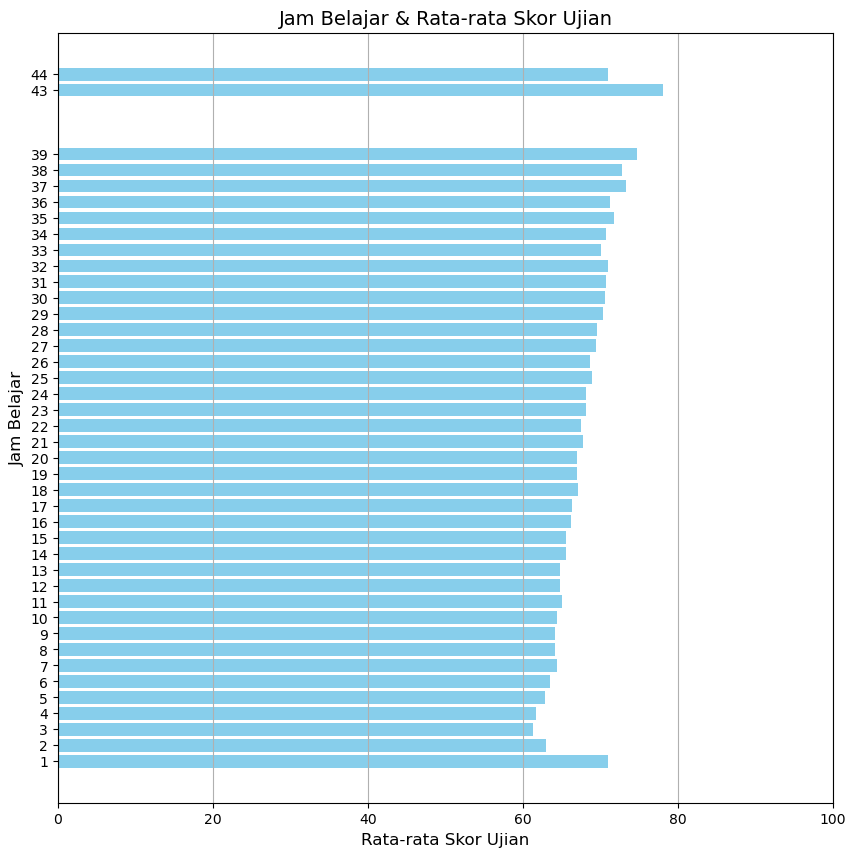

In [161]:
# Menghitung rata-rata skor ujian berdasarkan jam belajar
average_scores = df.groupby('Hours_Studied')['Exam_Score'].mean().reset_index()

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 10))
plt.barh(average_scores['Hours_Studied'], average_scores['Exam_Score'], 
         color='skyblue')

# Menambahkan detail dari statistik deskriptif ke dalam judul
plt.title('Jam Belajar & Rata-rata Skor Ujian', fontsize=14)
plt.xlabel('Rata-rata Skor Ujian', fontsize=12)
plt.ylabel('Jam Belajar', fontsize=12)

# Mengatur rentang sumbu x (karena diagram batang horizontal) jika perlu
plt.xlim(0, 100)  # Sesuaikan dengan rentang skor ujian yang diharapkan

# Menampilkan semua jam belajar di sumbu y
plt.yticks(average_scores['Hours_Studied'])

plt.grid(True, axis='x')
plt.show()


In [162]:
# Menghitung IQR
Q1 = df['Hours_Studied'].quantile(0.25)
Q3 = df['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outliers
outliers = df[(df['Hours_Studied'] < lower_bound) | (df['Hours_Studied'] > upper_bound)]
print(f'Jumlah outliers: {outliers.shape[0]}')
print(outliers[['Hours_Studied']])  # Menampilkan outliers

Jumlah outliers: 43
      Hours_Studied
209              43
262               1
478              38
1061              3
1101              3
1539              3
1591              2
1615             39
1957             39
1971              2
2024              2
2035             37
2305             39
2506             38
2521             38
2895             44
2947              2
3017              3
3152              3
3241             37
3454              2
3716             39
3982             39
4033              3
4047             37
4198              2
4207              3
4617              3
4635              3
4639              3
4725              1
4779              1
4784             37
4870             38
4997             39
5157             38
5224             38
5642              3
5673             37
5796             39
5846             38
5907              3
6350             37


In [163]:
#Menghapus Outlier
df = df[(df['Hours_Studied'] >= lower_bound) & (df['Hours_Studied'] <= upper_bound)]

In [164]:
#mengecek data duplicate
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []


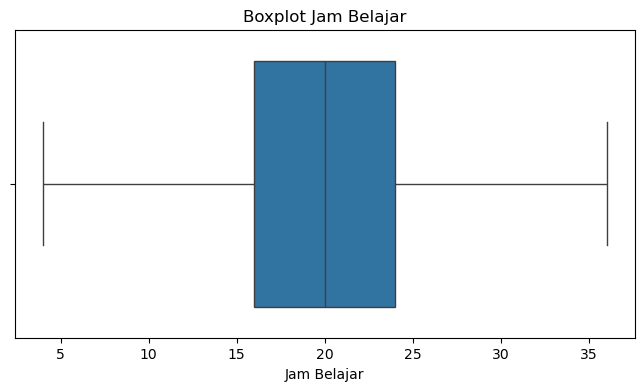

In [165]:

# Boxplot untuk Hours_Studied
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Hours_Studied'])
plt.title('Boxplot Jam Belajar')
plt.xlabel('Jam Belajar')
plt.show()

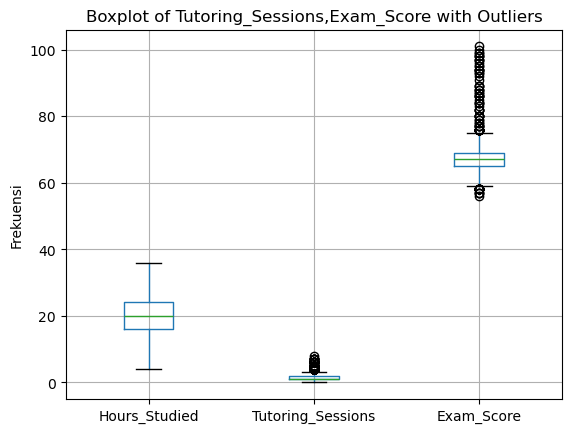

In [166]:
#Mengecek boxplot dari 3 kolom
df.boxplot(column=[ 'Hours_Studied','Tutoring_Sessions','Exam_Score' ])
plt.title('Boxplot of Tutoring_Sessions,Exam_Score with Outliers')
plt.ylabel('Frekuensi')
plt.show()

In [167]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']].quantile(0.25)
Q3 = df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']].quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df_cleaned = df[~((df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] < lower_bound) | (df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] > upper_bound)).any(axis=1)]


In [168]:
scaler = MinMaxScaler()
df_cleaned.loc[:, ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] = scaler.fit_transform(df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']])
scaler = StandardScaler()
df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] = df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']].astype(float)
scaler = MaxAbsScaler()
df_cleaned.loc[:, ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] = scaler.fit_transform(df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']])

C:\Users\ACER\AppData\Local\Temp\ipykernel_12332\4110934112.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.59375 0.46875 0.625   ... 0.5     0.1875  0.34375]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] = scaler.fit_transform(df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']])
C:\Users\ACER\AppData\Local\Temp\ipykernel_12332\4110934112.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.66666667 0.66666667 ... 1.         0.66666667 0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, ['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']] = scaler.fit_transform(df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']])
C:\U

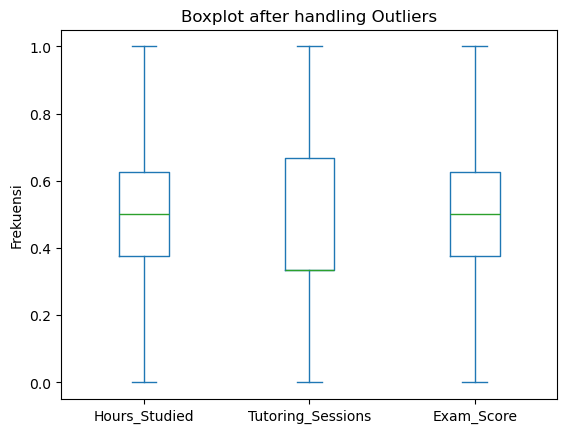

In [169]:
# Membuat ulang boxplot setelah menangani outliers
df_cleaned[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']].plot(kind='box', title='Boxplot after handling Outliers')
plt.ylabel('Frekuensi')
plt.show()

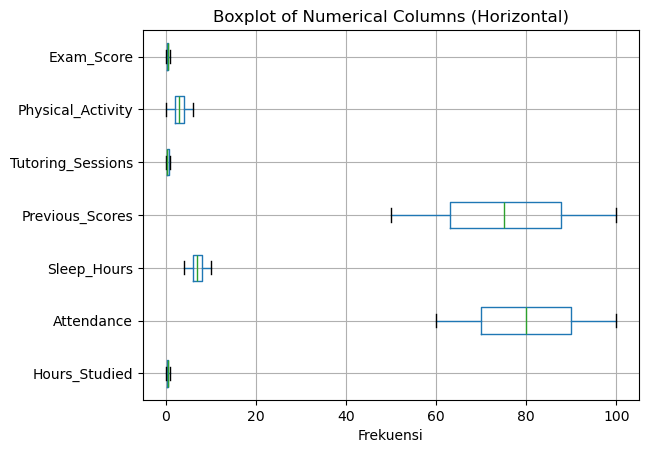

In [173]:
import matplotlib.pyplot as plt

# Membuat boxplot horizontal untuk beberapa kolom numerik
df_cleaned.boxplot(column=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                   'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'], vert=False)
plt.title('Boxplot of Numerical Columns (Horizontal)')
plt.xlabel('Frekuensi')
plt.show()
